# Data Preprocessing

In [1]:
import os
import sys
path_to_cv_module = r'c:\users\srish\appdata\local\programs\python\python39\lib\site-packages'
sys.path.append(path_to_cv_module)

In [2]:
import cv2
from tqdm import tqdm

In [3]:
files = r'deepfake-detection-challenge\train_sample_videos'
types_ = []

for file in os.listdir(files):
    types = file.split('.')[1]
    if types not in types_:
        types_.append(types)
types_

['mp4', 'json']

In [4]:
EXTRACT = False

files = r'deepfake-detection-challenge\train_sample_videos'
frames = r'frames'
def get_frames(files, frame_path, ext):
    count = 0
    for f in tqdm(os.listdir(files)):
        if 'mp4' in f:
            try:
                path = os.path.join(files, f)
                cap = cv2.VideoCapture(path)
                n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
                fps = int(cap.get(cv2.CAP_PROP_FPS))
                
                count += 1
                # print(n_frames, fps)    # 300, 29 for all videos; all videos are ~10s long
                
                framess = os.path.join(frame_path, f.split('.')[0])
                n = 0
                while True:
                    ret, frame = cap.read()
                    cv2.imwrite('{}_{}.{}'.format(framess, str(n).zfill(len(str(n_frames))), ext), frame)
                    n += 1
            except Exception as e:
                pass

        print(path)
        print(count)
if EXTRACT:
    get_frames(files, frames, 'jpg')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
json = [file for file in os.listdir(files) if file.endswith('json')][0]
json

'metadata.json'

In [7]:
data = pd.read_json('deepfake-detection-challenge/train_sample_videos/metadata.json')
data.head()

,aagfhgtpmv.mp4,aapnvogymq.mp4,abarnvbtwb.mp4,abofeumbvv.mp4,abqwwspghj.mp4,acifjvzvpm.mp4,acqfdwsrhi.mp4,acxnxvbsxk.mp4,acxwigylke.mp4,aczrgyricp.mp4,...,esnntzzajv.mp4,esxrvsgpvb.mp4,esyhwdfnxs.mp4,esyrimvzsa.mp4,etdcqxabww.mp4,etejaapnxh.mp4,etmcruaihe.mp4,etohcvnzbj.mp4,eudeqjhdfd.mp4,eukvucdetx.mp4
label,FAKE,FAKE,REAL,FAKE,FAKE,FAKE,FAKE,FAKE,FAKE,FAKE,...,FAKE,FAKE,FAKE,FAKE,FAKE,FAKE,FAKE,FAKE,REAL,FAKE
split,train,train,train,train,train,train,train,train,train,train,...,train,train,train,train,train,train,train,train,train,train
original,vudstovrck.mp4,jdubbvfswz.mp4,None,atvmxvwyns.mp4,qzimuostzz.mp4,kbvibjhfzo.mp4,ccfoszqabv.mp4,fjlyaizcwc.mp4,ffcwhpnpuw.mp4,slwkmefgde.mp4,...,ybetenmsye.mp4,gomwfvijiv.mp4,qeumxirsme.mp4,qzklcjjxdq.mp4,gipbyjfxfp.mp4,wtreibcmgm.mp4,afoovlsmtx.mp4,bdnaqemxmr.mp4,None,gjypopglvi.mp4


In [8]:
data = data.transpose()
data.head()

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


In [9]:
set(data['split'])

{'train'}

In [10]:
data.drop(columns = 'split', inplace = True)

In [11]:
data.head()

,label,original
aagfhgtpmv.mp4,FAKE,vudstovrck.mp4
aapnvogymq.mp4,FAKE,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,None
abofeumbvv.mp4,FAKE,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,qzimuostzz.mp4


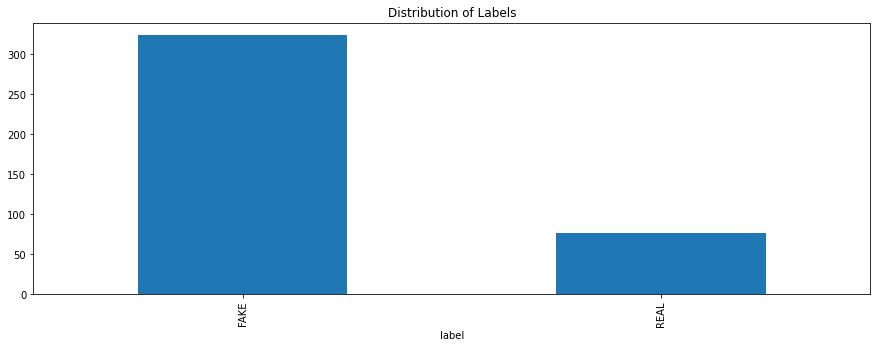

In [12]:
data.groupby('label')['label'].count().plot(figsize=(15, 5), kind='bar', title='Distribution of Labels')
plt.show()

In [13]:
distribution = data.groupby('label')['label'].count()
distribution

label
FAKE    323
REAL     77
Name: label, dtype: int64

In [14]:
pd.isnull(data['label']).any()

False

In [15]:
import torch
torch.cuda.is_available()

True

# GETTING IMAGES AND LABELS

In [16]:
index_list = []
for row in data.index:
    index_list.append(row)

In [17]:
len(index_list)

400

In [18]:
for i in range(len(index_list)):
    index_list[i] = index_list[i].split('.')[0]
index_list[0]

'aagfhgtpmv'

images_path = 'frames'
images = os.listdir(images_path)
images[0]

images[0].split('_')[0]

data.loc[index_list[0]+'.mp4', 'label']

data.loc[images[0].split('_')[0]+'.mp4', 'label']

len(images)

index_list[1], index_list[2]

images[300], images[600]

# TRAIN, VALIDATION, TEST SPLIT

from torch.utils.data import random_split
MANUAL_SEED = torch.Generator().manual_seed(42)
train, test = random_split(images, [71984, 47990], generator = MANUAL_SEED)    # 60, 40 split

len(train), len(test)

validation, test = random_split(test, [23995, 23995])   #50, 50 split

len(validation), len(test)

train[0], test[0], validation[0]

os.path.join('frames', train[0])

data.loc[train[0].split('_')[0]+'.mp4']['label']

#img = cv2.imread(os.path.join('frames', train[0]), cv2.IMREAD_COLOR)
#cv2.imshow('color image', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

img = plt.imread(os.path.join('frames', train[0]))
plt.imshow(img)

In [19]:
# img = plt.imread(os.path.join('frames', images[0]))
# plt.imshow(img)

### MAKING REAL FAKE TRAIN TEST VALIDATION FOLDERS

In [20]:
import os
import shutil

MOVE = False
def move_images(frames_directory, dataset_directory, split_info):
    if not os.path.exists(frames_directory):
        print(f"Frames directory '{frames_directory}' does not exist.")
        return

    for category in split_info:
        for label in split_info[category]:
            directory = os.path.join(dataset_directory, category, label)
            if not os.path.exists(directory):
                os.makedirs(directory)

    for root, _, files in os.walk(frames_directory):
        for file in files:
            if file in test:
                split = 'test'
            elif file in train:
                split = 'train'
            else:
                split = 'validation'
            label = 'REAL' if data.loc[file.split('_')[0]+'.mp4']['label'] == 'REAL' else 'FAKE'
            source_path = os.path.join(root, file)
            destination_directory = os.path.join(dataset_directory, split, label)
            destination_path = os.path.join(destination_directory, file)

            shutil.move(source_path, destination_path)
            print(f"Moved '{file}' to '{destination_path}'")

split_info = {
    'train': ['REAL', 'FAKE'],
    'test': ['REAL', 'FAKE'],
    'validation': ['REAL', 'FAKE']
}

if MOVE:
    move_images('frames', 'Dataset', split_info)

# DATA TRANSFORM

In [21]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [22]:
data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

image_path = 'Dataset/'

from pathlib import Path
import glob

def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

image_path_list = list(image_path.glob("*/*.jpg"))
plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

In [23]:
train_dir = 'Dataset/Train'
test_dir = 'Dataset/Test'
validation_dir = 'Dataset/Validation'

In [24]:
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir, # target folder of images
                                  transform = data_transform, # transforms to perform on data (images)
                                  target_transform = None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root = test_dir, 
                                 transform = data_transform)

validation_data = datasets.ImageFolder(root = validation_dir, 
                                 transform = data_transform)

In [25]:
class_names = train_data.classes
class_names

['FAKE', 'REAL']

In [26]:
class_dict = train_data.class_to_idx
class_dict

{'FAKE': 0, 'REAL': 1}

In [27]:
len(train_data), len(test_data), len(validation_data)

(71984, 23995, 23995)

In [28]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.7882, 0.7882, 0.7882,  ..., 0.8039, 0.7961, 0.7961],
         [0.7922, 0.7922, 0.7882,  ..., 0.8078, 0.7961, 0.7961],
         [0.7961, 0.7961, 0.7882,  ..., 0.8118, 0.8000, 0.7961],
         ...,
         [0.7569, 0.7647, 0.8039,  ..., 0.8000, 0.8157, 0.8392],
         [0.7569, 0.7608, 0.8078,  ..., 0.7961, 0.8118, 0.8353],
         [0.7529, 0.7608, 0.8078,  ..., 0.7922, 0.8078, 0.8314]],

        [[0.8314, 0.8314, 0.8314,  ..., 0.8235, 0.8275, 0.8314],
         [0.8314, 0.8314, 0.8314,  ..., 0.8235, 0.8275, 0.8314],
         [0.8314, 0.8314, 0.8314,  ..., 0.8235, 0.8275, 0.8314],
         ...,
         [0.8353, 0.8392, 0.8824,  ..., 0.8196, 0.8588, 0.9020],
         [0.8353, 0.8392, 0.8863,  ..., 0.8235, 0.8588, 0.9020],
         [0.8392, 0.8431, 0.8863,  ..., 0.8235, 0.8588, 0.9059]],

        [[0.7686, 0.7686, 0.7686,  ..., 0.7373, 0.7333, 0.7255],
         [0.7686, 0.7686, 0.7686,  ..., 0.7373, 0.7333, 0.7255],
         [0.7647, 0.7647, 0.7686,  ..., 0.74

In [29]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset = train_data, 
                              batch_size = 32, # how many samples per batch?
                              num_workers = os.cpu_count(), # how many subprocesses to use for data loading? (higher = more)
                              shuffle = True) # shuffle the data?

test_dataloader = DataLoader(dataset = test_data, 
                             batch_size = 32, 
                             num_workers = os.cpu_count(), 
                             shuffle = False) # don't usually need to shuffle testing data

validation_dataloader = DataLoader(dataset = validation_data, 
                             batch_size = 32, 
                             num_workers = os.cpu_count(), 
                             shuffle = False)
train_dataloader, test_dataloader, validation_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x21f89197340>,
 <torch.utils.data.dataloader.DataLoader at 0x21f89197ac0>)

# MODEL TRAIN

### CNN

path = os.walk('frames')

path

list(path)[0][:2]

In [30]:
import torch.nn as nn
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=0), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*53*53,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=28090, out_features=2, bias=True)
  )
)

In [31]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 224, 224])

Output logits:
tensor([[0.0326, 0.0052]], device='cuda:0')

Output prediction probabilities:
tensor([[0.5068, 0.4932]], device='cuda:0')

Output prediction label:
tensor([0], device='cuda:0')

Actual label:
1


In [32]:
import torchinfo
from torchinfo import summary
summary(model_0, input_size=[1, 3, 224, 224]) # do a test pass through of an example input size 

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 2]                    --
├─Sequential: 1-1                        [1, 10, 110, 110]         --
│    └─Conv2d: 2-1                       [1, 10, 222, 222]         280
│    └─ReLU: 2-2                         [1, 10, 222, 222]         --
│    └─Conv2d: 2-3                       [1, 10, 220, 220]         910
│    └─ReLU: 2-4                         [1, 10, 220, 220]         --
│    └─MaxPool2d: 2-5                    [1, 10, 110, 110]         --
├─Sequential: 1-2                        [1, 10, 53, 53]           --
│    └─Conv2d: 2-6                       [1, 10, 108, 108]         910
│    └─ReLU: 2-7                         [1, 10, 108, 108]         --
│    └─Conv2d: 2-8                       [1, 10, 106, 106]         910
│    └─ReLU: 2-9                         [1, 10, 106, 106]         --
│    └─MaxPool2d: 2-10                   [1, 10, 53, 53]           --
├─Sequentia

In [33]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [34]:
def validation_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    val_loss, val_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            val_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(val_pred_logits, y)
            val_loss += loss.item()
            
            # Calculate and accumulate accuracy
            val_pred_labels = val_pred_logits.argmax(dim=1)
            val_acc += ((val_pred_labels == y).sum().item()/len(val_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    val_loss = val_loss / len(dataloader)
    val_acc = val_acc / len(dataloader)
    return val_loss, val_acc

In [35]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          validation_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "val_loss": [],
        "val_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        val_loss, val_acc = validation_step(model=model,
            dataloader=validation_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"val_loss: {val_loss:.4f} | "
            f"val_acc: {val_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["val_loss"].append(val_loss)
        results["val_acc"].append(val_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [36]:
# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader,
                        validation_dataloader=validation_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.3890 | train_acc: 0.8239 | val_loss: 0.3425 | val_acc: 0.8347
Epoch: 2 | train_loss: 0.3048 | train_acc: 0.8583 | val_loss: 0.2963 | val_acc: 0.8632
Epoch: 3 | train_loss: 0.2718 | train_acc: 0.8718 | val_loss: 0.2871 | val_acc: 0.8699
Epoch: 4 | train_loss: 0.2501 | train_acc: 0.8823 | val_loss: 0.2642 | val_acc: 0.8778
Epoch: 5 | train_loss: 0.2313 | train_acc: 0.8919 | val_loss: 0.2461 | val_acc: 0.8886
Total training time: 25096.884 seconds


In [37]:
from pathlib import Path

# Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# Create model save path
MODEL_NAME = 'deepfake_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

Saving model to: models\deepfake_model_0.pth


In [46]:
model = TinyVGG(input_shape = 3,
                  hidden_units = 10, 
                  output_shape = len(train_data.classes))
# optimizer = TheOptimizerClass(*args, **kwargs)

# checkpoint = torch.load(MODEL_SAVE_PATH)
model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# epoch = checkpoint['epoch']
# loss = checkpoint['loss']

model.eval()

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=28090, out_features=2, bias=True)
  )
)

In [47]:
model.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 1.1837e-01,  2.9026e-01,  2.6288e-01],
                        [-1.4079e-01,  2.6763e-02,  1.5631e-01],
                        [ 1.7408e-02,  7.9755e-02, -1.3270e-01]],
              
                       [[-5.3196e-02,  1.3283e-01,  9.5511e-03],
                        [-6.4856e-02, -1.6480e-01, -4.3972e-02],
                        [-1.9400e-01, -2.4632e-01,  1.0945e-01]],
              
                       [[-2.2386e-01,  6.4286e-02, -7.8982e-02],
                        [-7.9667e-02, -5.5558e-02, -6.5885e-02],
                        [ 4.8525e-02, -8.7299e-02, -7.2351e-02]]],
              
              
                      [[[ 1.5011e-01, -1.9989e-02,  8.6248e-02],
                        [ 1.0760e-01,  4.8993e-02,  4.2714e-02],
                        [ 2.6001e-01,  1.0274e-01, -3.7092e-02]],
              
                       [[ 2.4738e-01,  3.6498e-02, -9.9289e-02],
                        [ 2.6273e-01

In [49]:
model.eval()

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=28090, out_features=2, bias=True)
  )
)

In [48]:
with torch.inference_mode():
    loaded_model_preds = model(test_dataloader)

TypeError: conv2d() received an invalid combination of arguments - got (DataLoader, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: ([31;1mDataLoader[0m, [31;1mParameter[0m, [31;1mParameter[0m, [31;1mtuple of (int, int)[0m, [31;1mtuple of (int, int)[0m, [31;1mtuple of (int, int)[0m, [32;1mint[0m)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: ([31;1mDataLoader[0m, [31;1mParameter[0m, [31;1mParameter[0m, [31;1mtuple of (int, int)[0m, [31;1mtuple of (int, int)[0m, [31;1mtuple of (int, int)[0m, [32;1mint[0m)
